In [46]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')


<ipython-input-46-6100ab58204d>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Gradient Descent in 1-D

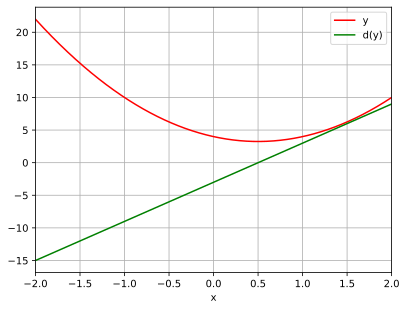

In [47]:
#define a function
def fxn(x):
    return 3*x**2 - 3*x + 4

def deriv(x):
    return 6*x - 3

x = np.linspace(-2,2,2001)

plt.plot(x,fxn(x),'r')
plt.plot(x,deriv(x),'g')
plt.xlim(-2,2)
plt.xlabel('x')
plt.grid()
plt.legend(['y','d(y)'])

In [48]:
#Implementing the algorithm

#Assume a random minima
minima = np.random.choice(x,1)
print(f'Initial random guess of minima = {minima}')

num_of_epochs = 100
learning_rate = 0.01

#Iterate over the loop
for i in range(0,num_of_epochs):
    gradient = deriv(minima)
    minima = minima - (gradient)*(learning_rate)

print(f'Final derived minima = {minima}')

Initial random guess of minima = [0.038]
Final derived minima = [0.49905065]


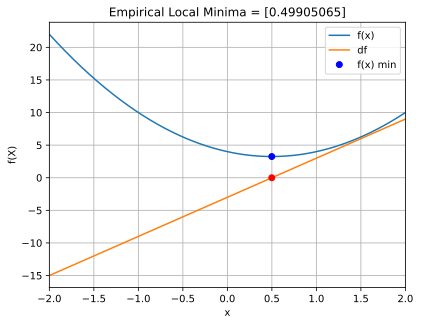

In [49]:
#PLotting
plt.plot(x,fxn(x))
plt.plot(x,deriv(x))
plt.plot(minima,fxn(minima),'bo')
plt.plot(minima,deriv(minima),'ro')
plt.grid()
plt.xlim(-2,2)
plt.legend(['f(x)','df','f(x) min'])
plt.xlabel('x')
plt.ylabel('f(X)')
plt.title(f'Empirical Local Minima = {minima}')
plt.show()



In [50]:
#PLoT the gradients(derivatives) and minimas in each iteration

minima = np.random.choice(x,1)

num_of_epochs = 100
learning_rate = 0.02

model_parameters = np.zeros((num_of_epochs,2))
for i in range(num_of_epochs):
    gradient = deriv(minima)
    minima = minima - (learning_rate)*(gradient)
    model_parameters[i,0] = minima[0] #Assigning the minimas in each epoch to the respective row
    model_parameters[i,1] = gradient[0] #Assigning the gradients in each epoch to the respective row

#Above we used minima[0] and gradient[0] rather than minima and gradient. Because here minima and gradient are numpy arrays with a single element in every epoch
#So we have to first extract the scalar value from the numpy arrays and then assign them to the model_parameters array


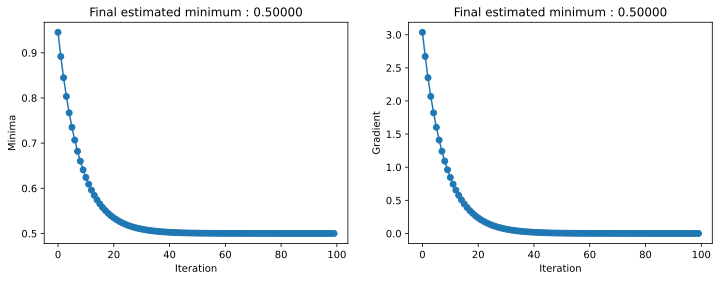

In [51]:
#Plot the minima and gradient in each epoch
fig,axes = plt.subplots(1,2,figsize = (12,4))

for i in range(2):
    axes[i].plot(model_parameters[:,i],'o-')
    axes[i].set_xlabel('Iteration')
    axes[i].set_title(f'Final estimated minimum : {model_parameters[99,0]:.5f}')

axes[0].set_ylabel('Minima')
axes[1].set_ylabel('Gradient')
plt.show()

# Code Challenge


The final Minimum of the function = [0.]


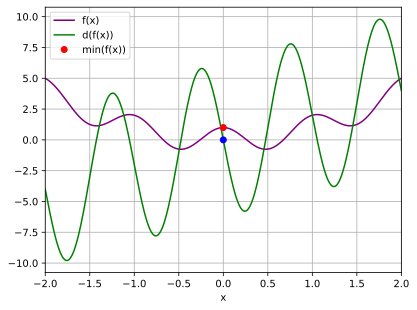

In [52]:
import math

def func(x):
    return np.cos(2*math.pi*x) + x**2

def deriv(x):
    return -2*math.pi*np.sin(2*math.pi*x) + 2*x

x = np.linspace(-2,2,2001)
minima = np.array([0])

num_of_epochs = 100
learn_rate = 0.05

for i in range(num_of_epochs):
    gradient = deriv(minima)
    minima = minima - learn_rate*gradient

print(f'The final Minimum of the function = {minima}')

#Plot the function and its derivative
plt.plot(x,func(x),'purple')
plt.plot(x,deriv(x),'g')
plt.plot(minima,func(minima),'ro')
plt.plot(minima,deriv(minima),'bo')
plt.xlabel('x')
plt.xlim(-2,2)
plt.grid()
plt.legend(['f(x)','d(f(x))','min(f(x))'])

# Gradient Descent in 2-D


In [53]:
import sympy as sym #To compute the partial derivatives

from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-53-77993edadbad>:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [54]:
def peaks(x,y):
    #expanding to a 2D mesh
    x,y = np.meshgrid(x,y)

    z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
        - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
        - 1/3*np.exp(-(x+1)**2 - y**2)

    return z

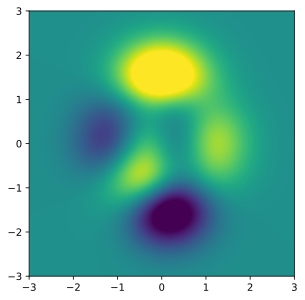

In [55]:
#create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

#Have a look at visualisation
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()


In [56]:
#create the derivate functions using sympy

sx,sy = sym.symbols('sx,sy')


sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
     - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
     - 1/3*sym.exp(-(sx+1)**2 - sy**2)

df_x = sym.lambdify((sx,sy),sym.diff(sZ,sx),'sympy')
df_y = sym.lambdify((sx,sy),sym.diff(sZ,sy),'sympy')

#The gradient of the funxtion at (1,1)
print(df_x(1,1).evalf(),df_y(1,1).evalf())

-1.07369833656079 1.89918592997863


In [57]:
#Now lets go to the Gradient Descent Part

#Random starting point (uniform btw -2 and 2)
localmin = np.random.rand(2)*4-2
startpnt = localmin[:]

# learning parameters
learning_rate = 0.01
training_epochs = 1000

#Apply GD algo
trajectory =  np.zeros((training_epochs,2))
for i in range(training_epochs):
    gradient = np.array([df_x(localmin[0],localmin[1]), #Partial deriv w.r.t x
                         df_y(localmin[0],localmin[1])]) #Partial deriv w.r.t y
    localmin = localmin - learning_rate*gradient
    trajectory[i,0] = localmin[0]
    trajectory[i,1] = localmin[1]

print(f"The staring random localmin = {startpnt}")
print(f"Final localmin = {localmin}")


The staring random localmin = [-1.98666324 -0.12067511]
Final localmin = [-1.34739624436821 0.204518866097005]


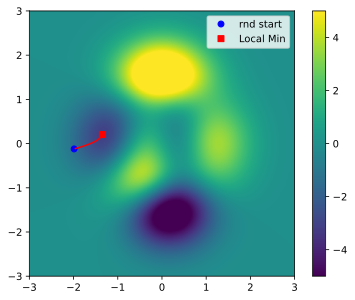

In [58]:
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bo')
plt.plot(localmin[0],localmin[1],'rs')
plt.plot(trajectory[:,0],trajectory[:,1],'r-')
plt.legend(['rnd start','Local Min'])
plt.colorbar()
plt.show()

# Code Challenge


Challenge is to construct a Gradient ascent algorithm (It goes to local maximum)

In [59]:
#create the derivate functions using sympy

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
     - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
     - 1/3*sym.exp(-(sx+1)**2 - sy**2)

#The partial derivatives w.r.t x and y
df_x = sym.lambdify((sx,sy),sym.diff(sZ,sx),'sympy')
df_y = sym.lambdify((sx,sy),sym.diff(sZ,sy),'sympy')


In [60]:
#Random starting point (uniform btw -2 and 2)
localmin = np.random.rand(2)*4-2
startpnt = localmin[:]

# learning parameters
learning_rate = 0.01
training_epochs = 1000

#Apply algo
trajectory =  np.zeros((training_epochs,2))
for i in range(training_epochs):
    gradient = np.array([df_x(localmin[0],localmin[1]),
                         df_y(localmin[0],localmin[1])])
    localmin = localmin + learning_rate*gradient #Modification for gradient ascent
    trajectory[i,0] = localmin[0]
    trajectory[i,1] = localmin[1]

print(f"The staring random localmin = {startpnt}")
print(f"Final localmin = {localmin}")


The staring random localmin = [1.18691887 0.12232336]
Final localmin = [1.28568469724130 -0.00484755907559365]


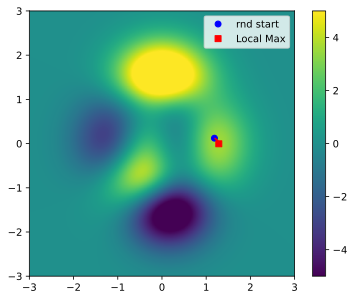

In [61]:
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bo')
plt.plot(localmin[0],localmin[1],'rs')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','Local Max'])
plt.colorbar()
plt.show()

# Parametric Experiments on GD


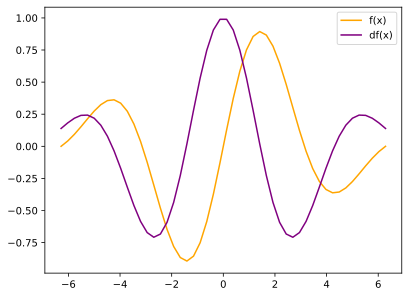

In [62]:
#The function
x = np.linspace(-2*np.pi,2*np.pi)
fx = np.sin(x) * np.exp(-x**2*0.05)

# The function's derivative
df = np.cos(x) * np.exp(-x**2*0.05) + np.sin(x) * (-0.1*x)*np.exp(-x**2*0.05)

#Plot the function
plt.plot(x,fx,'orange')
plt.plot(x,df,'purple')
plt.legend(['f(x)','df(x)'])
plt.show()

In [63]:
#Define the functions

def f(x):
    return np.sin(x) * np.exp(-x**2*0.05)

def deriv(x):
    return np.cos(x) * np.exp(-x**2*0.05) + np.sin(x) * (-0.1*x)*np.exp(-x**2*0.05)


Below we choose a random starting location


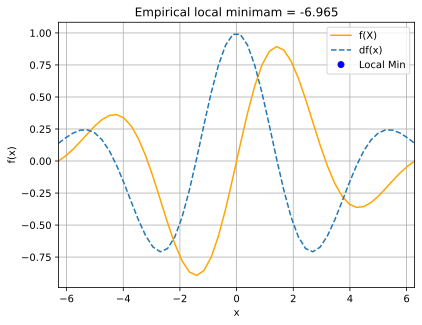

In [64]:
#Choose a random starting point
x = np.linspace(-2*np.pi,2*np.pi)
local_min = np.random.choice(x,1)

#Parameters
learn_rate = 0.01
num_of_epochs = 1000

#Apply the alogrithm
for i in range(num_of_epochs):
    gradient = deriv(local_min)
    local_min = local_min - gradient*learn_rate

#PLot the localmin
plt.plot(x,f(x),'orange')
plt.plot(x,deriv(x),'--')
plt.plot(local_min,f(local_min),'bo',local_min,deriv(local_min),'ro')
plt.xlim(x[0],x[-1])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Empirical local minimam = {local_min[0]:.3f}')
plt.legend(['f(X)','df(x)','Local Min'])
plt.grid()
plt.show()

Experiment 1 : Systematically varying the starting locations

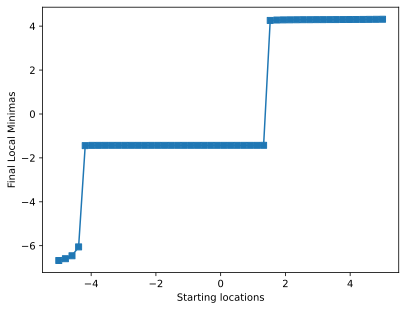

In [65]:
# Exp 1 : Systematically varying the starting locations
startlocs = np.linspace(-5,5,50)
local_mins_list = np.zeros(len(startlocs))

#Parameters
learn_rate = 0.01
num_of_epochs = 1000

# Loop over the starting points in startlocs
for idx,localmin in enumerate(startlocs):

    #Apply the GD alogorithm
    for i in range(num_of_epochs):
        gradient = deriv(localmin)
        localmin = localmin - gradient * learn_rate

    local_mins_list[idx] = localmin

#plot the results
plt.plot(startlocs,local_mins_list,'s-')
plt.xlabel('Starting locations')
plt.ylabel('Final Local Minimas')
plt.show()

Experiment 2 : Systematically vary the learning rates

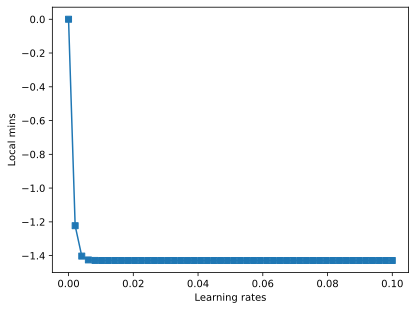

In [66]:
#Exp 2 : Systematically vary the learning rates

learn_rates = np.linspace(1e-10,1e-1,50)
local_mins_list = np.zeros(len(learn_rates))

num_of_epochs = 1000

#Loop over the learning rates
for idx,learn_rate in enumerate(learn_rates):

    #Force starting localmin to be zero
    localmin = 0

    #Apply the GD alogorithm
    for i in range(num_of_epochs):
        gradient = deriv(localmin)
        localmin  = localmin - gradient * learn_rate

    local_mins_list[idx] = localmin

#Plot the results
plt.plot(learn_rates,local_mins_list,'s-')
plt.xlabel('Learning rates')
plt.ylabel('Local mins')
plt.show()

Experiment 3 : Interaction between the learning rates and epochs

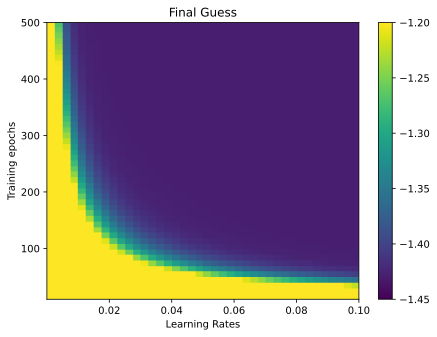

In [67]:
#Exp 3 : Interaction bewteen learning rates and training epochs

# Set up parameters
learning_rates = np.linspace(1e-10,1e-1,50)
training_epochs = np.linspace(10,500,40)

#Store The resulting local minimums
final_results = np.zeros((len(learning_rates),len(training_epochs)))

#loop over the learning rates
for i,learn_rate in enumerate(learning_rates):

    #loop over the training epochs
    for j,eps in enumerate(training_epochs):

        #Force the starting localmin to be 0
        localmin = 0

        #Apply the GD algorithm
        for n in range(int(eps)):
            gradient = deriv(localmin)
            localmin = localmin - gradient * learn_rate

        final_results[i,j] = localmin

#Plot the results
fig,axes = plt.subplots(figsize=(7,5))
plt.imshow(final_results,extent = [learning_rates[0],learning_rates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin = '-1.45',vmax='-1.2')
plt.xlabel('Learning Rates')
plt.ylabel('Training epochs')
plt.title('Final Guess')
plt.colorbar()




# Exploring dynamic Learning Rate

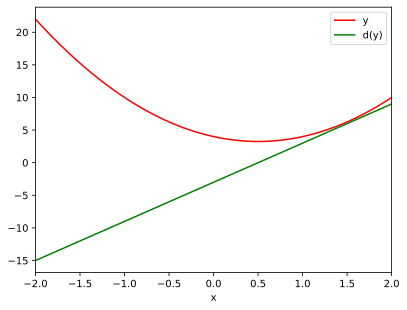

In [68]:
#define a function
def fxn(x):
    return 3*x**2 - 3*x + 4

def deriv(x):
    return 6*x - 3

x = np.linspace(-2,2,2001)

plt.plot(x,fxn(x),'r')
plt.plot(x,deriv(x),'g')
plt.xlim(-2,2)
plt.xlabel('x')
plt.legend(['y','d(y)'])

Gradient Descent using a fixed learning rate

In [69]:
#Implementing the algorithm

#Assume a random minima
minima = np.random.choice(x,1)
localmin = minima[:]
print(f'Initial random guess of minima = {minima}')

num_of_epochs = 50
learning_rate = 0.01

model_paramsFixed = np.zeros((num_of_epochs,3))

#Iterate over the loop
for i in range(0,num_of_epochs):
    gradient = deriv(minima)

    lr = learning_rate #Fixed learning rate
    minima = minima - (gradient)*(lr)

    #store the parameters
    model_paramsFixed[i,:] = minima[0],gradient[0],lr

print(f'Final derived minima = {minima}')

Initial random guess of minima = [-1.338]
Final derived minima = [0.41668212]


Gradient Descent using a gradient-based learning rate

In [70]:
#Implementing the algorithm

#Assume a random minima
minima = localmin
print(f'Initial random guess of minima = {minima}')

num_of_epochs = 50
learning_rate = 0.01

model_paramsGrad = np.zeros((num_of_epochs,3))

#Iterate over the loop
for i in range(0,num_of_epochs):
    gradient = deriv(minima)

    lr = learning_rate*np.abs(gradient) #Learning rate according to gradient
    minima = minima - (gradient)*(lr)

    #store the parameters
    model_paramsGrad[i,:] = minima[0],gradient[0],lr[0]

print(f'Final derived minima = {minima}')

Initial random guess of minima = [-1.338]
Final derived minima = [0.45050579]


Gradient Descent using a time based learning rate


In [71]:
#Implementing the algorithm

#Assume a random minima
minima = localmin
print(f'Initial random guess of minima = {minima}')

num_of_epochs = 50
learning_rate = 0.1

model_paramsTime= np.zeros((num_of_epochs,3))

#Iterate over the loop
for i in range(0,num_of_epochs):
    gradient = deriv(minima)

    lr = learning_rate * (1-(i+1)/num_of_epochs) #Time based learning rate
    minima = minima - (gradient)*(lr)

    #store the parameters
    model_paramsTime[i,:] = minima[0],gradient[0],lr

print(f'Final derived minima = {minima}')

Initial random guess of minima = [-1.338]
Final derived minima = [0.49999999]


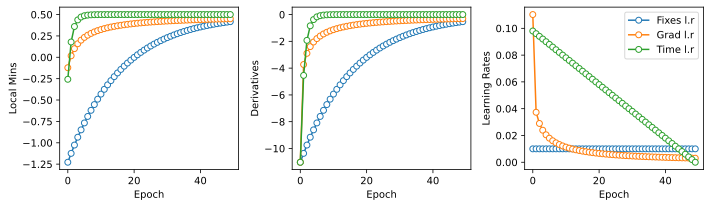

In [72]:
#Plot the results

fig,axes = plt.subplots(1,3,figsize=(10,3))

for i in range(3):
    axes[i].plot(model_paramsFixed[:,i],'o-',markerfacecolor='white')
    axes[i].plot(model_paramsGrad[:,i],'o-',markerfacecolor='white')
    axes[i].plot(model_paramsTime[:,i],'o-',markerfacecolor='white')
    axes[i].set_xlabel('Epoch')

axes[0].set_ylabel('Local Mins')
axes[1].set_ylabel('Derivatives')
axes[2].set_ylabel('Learning Rates')
axes[2].legend(['Fixes l.r','Grad l.r','Time l.r'])

plt.tight_layout()
plt.show()